# 6. Unsupervised Machine Learning: Clustering

## Contains:

#### 1. Importing libraries and data and renaming columns
#### 2. Data preprocessing
#### 3. The elbow technique
#### 4. k-means clustering

#### 5. Add column year_month and exclude dataframe for Tableau

### Importing libraries and data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'/Users/sophie/Desktop/CareerFoundry /10 2023 missing migrants'
path

'/Users/sophie/Desktop/CareerFoundry /10 2023 missing migrants'

In [4]:
df_mm = pd.read_pickle(os.path.join(path, 'Data', 'prepared data', 'df_mm.pkl'))
df_mm.head()

,main_ID,incident_ID,inc_type,region_inc,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,...,country_origin,migration_route,loc_death,info_source,UNSD_geo_group,source_quality,inc_type_num,vict_per_incidents,coordinates,continent
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,1,2014,1,1,0,...,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4,"31.650259, -110.366453",North America
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,1,2014,1,1,0,...,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4,"31.59713, -111.73756",North America
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,1,2014,1,1,0,...,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4,"31.94026, -113.01125",North America
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,1,2014,1,1,0,...,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",Northern America,5,1,1-4,"31.506777, -109.315632",North America
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,1,2014,1,3,2,...,Sudan,Unknown,Border between Russia and Estonia,EUBusiness (Agence France-Presse),Northern Europe,1,1,1-4,"59.1551, 28.0",Europe


In [5]:
df_mm.shape

(13493, 26)

### 2. Data preprocessing

In [6]:
# Check for missing values

df_mm.isnull().sum()

# No missing values to handle

main_ID                0
incident_ID            0
inc_type               0
region_inc             0
website_date_new       0
month_num              0
year                   0
tot_dead_miss          0
tot_migrants           0
tot_survive            0
identified_demogr      0
unidentified_demogr    0
latitude               0
longitude              0
reg_origin             0
cause_death            0
country_origin         0
migration_route        0
loc_death              0
info_source            0
UNSD_geo_group         0
source_quality         0
inc_type_num           0
vict_per_incidents     0
coordinates            0
continent              0
dtype: int64

In [7]:
# Duplicates check

dups = df_mm.duplicated()
dups.shape # No dups

(13493,)

In [8]:
# Check inconsistencies
df_mm.describe()

,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr,latitude,longitude,source_quality,inc_type_num
count,13493,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000,13493.000000
mean,2019-09-17 14:34:35.209368064,6.684355,2019.197510,4.389461,10.878826,6.489365,1.813829,2.575632,27.144641,-17.913633,3.264063,1.027199
min,2014-01-02 00:00:00,1.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,-87.000000,-37.462916,-144.774250,1.000000,1.000000
25%,2017-10-08 00:00:00,4.000000,2017.000000,1.000000,1.000000,0.000000,1.000000,0.000000,22.056701,-98.454803,2.000000,1.000000
50%,2019-10-05 00:00:00,7.000000,2019.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.719405,11.140718,4.000000,1.000000
75%,2021-11-30 00:00:00,9.000000,2021.000000,2.000000,3.000000,0.000000,1.000000,1.000000,33.071990,27.311734,4.000000,1.000000
max,2023-10-17 00:00:00,12.000000,2023.000000,1022.000000,1952.000000,1950.000000,250.000000,1022.000000,66.929981,138.086033,5.000000,2.000000
std,NaN,3.340813,2.482202,19.662386,48.698793,41.738181,5.952016,18.163062,11.370606,65.371556,1.371919,0.162670


In [9]:
# Filter rows where 'unidentified_demogr' is negative
negative_demogr_rows = df_mm[df_mm['unidentified_demogr'] < 0]

selected_columns = negative_demogr_rows[['main_ID', 'tot_dead_miss', 'identified_demogr', 'unidentified_demogr']]

# Print the selected columns
print(selected_columns)

             main_ID  tot_dead_miss  identified_demogr  unidentified_demogr
14     2014.MMP00015              1                  2                   -1
15     2014.MMP00016              1                  2                   -1
35     2014.MMP00036              1                  2                   -1
75     2014.MMP00077              1                  2                   -1
88     2014.MMP00090              1                  2                   -1
...              ...            ...                ...                  ...
13116   2023.MMP0670              2                 11                   -9
13242   2023.MMP0798              6                  7                   -1
13262   2023.MMP0818              1                  2                   -1
13263   2023.MMP0819              1                  2                   -1
13331   2023.MMP0887              4                  7                   -3

[926 rows x 4 columns]


In [10]:
# Create a new DataFrame excluding rows with negative 'unidentified_demogr'
new_df = df_mm[df_mm['unidentified_demogr'] >= 0]
new_df.shape

(12567, 26)

### *Remove categorical variables*

In [11]:
categorical_columns = new_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['main_ID', 'incident_ID', 'inc_type', 'region_inc', 'reg_origin',
       'cause_death', 'country_origin', 'migration_route', 'loc_death',
       'info_source', 'UNSD_geo_group', 'vict_per_incidents', 'coordinates',
       'continent'],
      dtype='object')

In [12]:
# Create a new DataFrame excluding categorical columns
numerical_df = new_df.drop(categorical_columns, axis=1)

# Display the new DataFrame
numerical_df

,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr,latitude,longitude,source_quality,inc_type_num
0,2014-01-06,1,2014,1,1,0,1,0,31.650259,-110.366453,5,1
1,2014-01-12,1,2014,1,1,0,0,1,31.597130,-111.737560,5,1
2,2014-01-14,1,2014,1,1,0,0,1,31.940260,-113.011250,5,1
3,2014-01-16,1,2014,1,1,0,1,0,31.506777,-109.315632,5,1
4,2014-01-16,1,2014,1,3,2,1,0,59.155100,28.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13488,2023-10-11,10,2023,1,3,2,1,0,32.541568,-117.061009,3,1
13489,2023-10-13,10,2023,7,23,16,1,6,48.246277,12.410189,3,1
13490,2023-10-12,10,2023,2,7,5,2,0,46.490423,19.736968,3,1
13491,2023-10-01,10,2023,1,8,7,0,1,36.076337,35.807006,5,1


In [13]:
# Exclude the 'latitude' and 'longitude' columns
columns_to_exclude = ['website_date_new', 'latitude', 'longitude']
numerical_df = numerical_df.drop(columns=columns_to_exclude)

# Display the new DataFrame
numerical_df

,month_num,year,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr,source_quality,inc_type_num
0,1,2014,1,1,0,1,0,5,1
1,1,2014,1,1,0,0,1,5,1
2,1,2014,1,1,0,0,1,5,1
3,1,2014,1,1,0,1,0,5,1
4,1,2014,1,3,2,1,0,1,1
...,...,...,...,...,...,...,...,...,...
13488,10,2023,1,3,2,1,0,3,1
13489,10,2023,7,23,16,1,6,3,1
13490,10,2023,2,7,5,2,0,3,1
13491,10,2023,1,8,7,0,1,5,1


### 3. The elbow technique¶

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(numerical_df).score(numerical_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/sophie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sophie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sophie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sophie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

[-63041948.80082754,
 -30543462.85243643,
 -21519487.308002494,
 -16175005.235512104,
 -12027033.69714826,
 -9409905.403253919,
 -7797569.395971225,
 -6345014.108590167,
 -5588328.015388219]

In [ ]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### N = 3 cluster seems reasonable, as there is a substantial breaking point. Adding more clusters won’t help better explain the variances in the data, but also not less than 3. Otherwise, I wouldn't get enough granularity.

### 4. k-means clustering

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [17]:
# Fit the k-means object to the data.

kmeans.fit(numerical_df)

/Users/sophie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [18]:
# Add clusters in a new columnn to dataframe

numerical_df['clusters'] = kmeans.fit_predict(numerical_df)

/Users/sophie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
numerical_df.head(10)

,month_num,year,tot_dead_miss,tot_migrants,tot_survive,identified_demogr,unidentified_demogr,source_quality,inc_type_num,clusters
0,1,2014,1,1,0,1,0,5,1,0
1,1,2014,1,1,0,0,1,5,1,0
2,1,2014,1,1,0,0,1,5,1,0
3,1,2014,1,1,0,1,0,5,1,0
4,1,2014,1,3,2,1,0,1,1,0
5,1,2014,1,1,0,0,1,5,1,0
6,1,2014,12,12,0,12,0,5,1,0
7,1,2014,1,1,0,0,1,5,1,0
8,1,2014,1,1,0,0,1,5,1,0
9,1,2014,1,1,0,0,1,5,1,0


In [20]:
numerical_df.columns

Index(['month_num', 'year', 'tot_dead_miss', 'tot_migrants', 'tot_survive',
       'identified_demogr', 'unidentified_demogr', 'source_quality',
       'inc_type_num', 'clusters'],
      dtype='object')

In [21]:
numerical_df['clusters'].value_counts()

clusters
0    12184
2      349
1       34
Name: count, dtype: int64

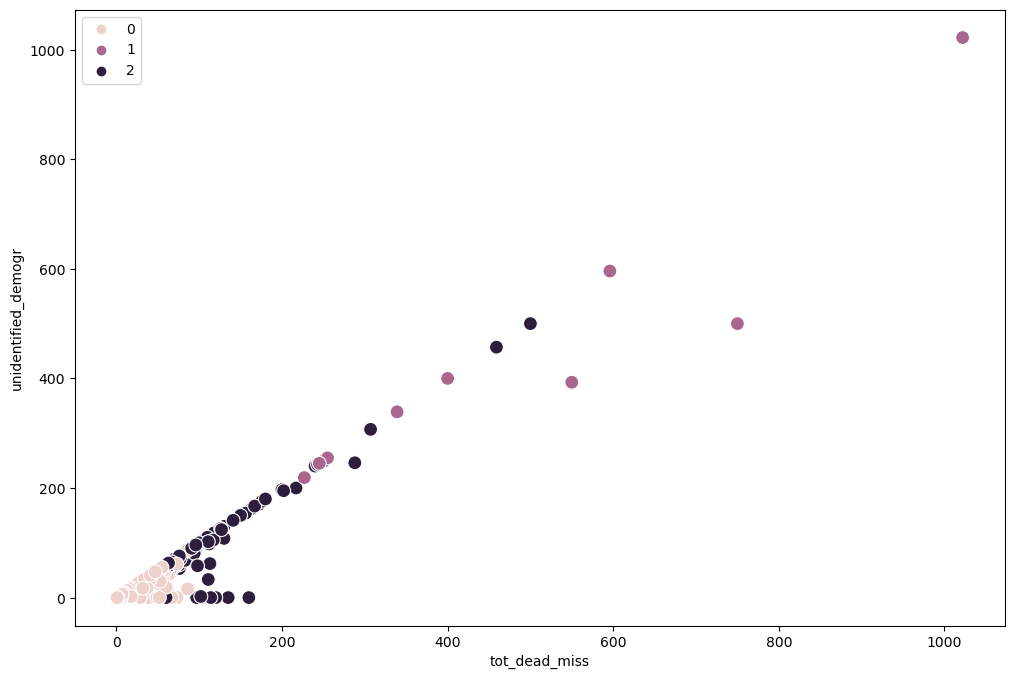

In [22]:
# Plot the clusters for the "tot_dead_miss" and "unidentified_demog" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['tot_dead_miss'], y=numerical_df['unidentified_demogr'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('tot_dead_miss') # Label x-axis.
plt.ylabel('unidentified_demogr') # Label y-axis.
plt.show()

#### Interpretation: the light-pink group consists of incidents with a lower number of victims per incident with no clear trend regarding demographical identification. Out of this accumulation, a line of the dark-violet cluster emerges, with a linear trend besind a number of incidents with victims between 100 and 200 that are unidentified. Then the line consists of the medium-pink cluster, which has some outliers. From this plot we can follow that the number of victims per incident is important for cluster differentiation.

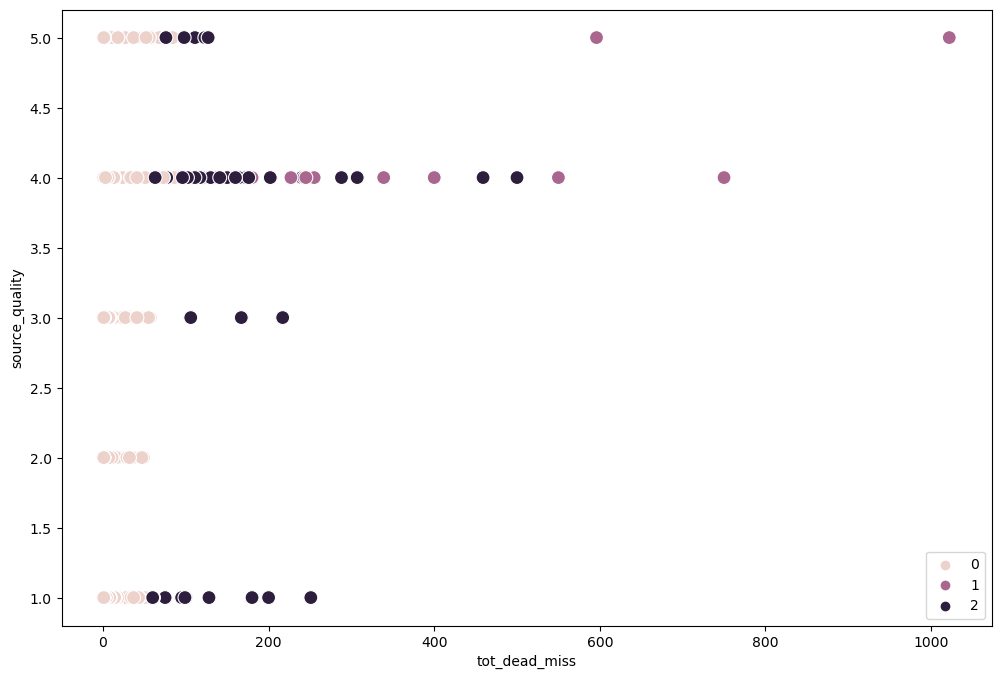

In [23]:
# Plot the clusters for the "tot_dead_miss" and "source quality" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['tot_dead_miss'], y=numerical_df['source_quality'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('tot_dead_miss') # Label x-axis.
plt.ylabel('source_quality') # Label y-axis.
plt.show()

#### This plot does not seem to be informative.

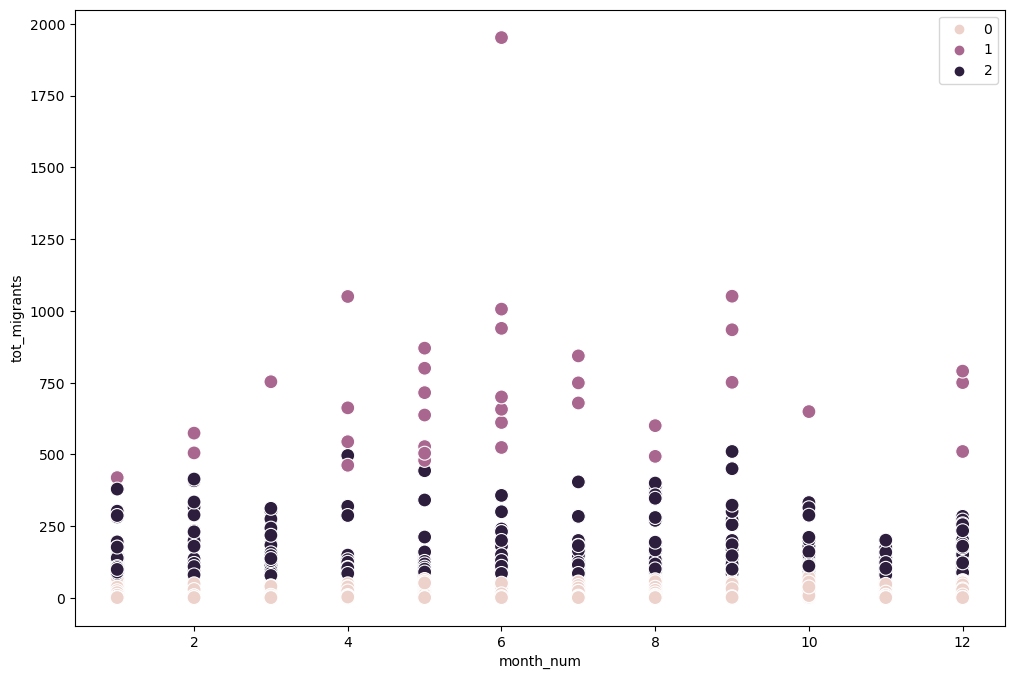

In [24]:
# Plot the clusters for the "tot_dead_miss" and "unidentified_demog" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['month_num'], y=numerical_df['tot_migrants'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('month_num') # Label x-axis.
plt.ylabel('tot_migrants') # Label y-axis.
plt.show()

#### The total number of migrants are highest for the cluster of incidents with many victims in summer months of the western hemisphere (medium-pink line). Incidents with a lower number of vitims (light-pink) are related to a consistent number of migrants across the year.   

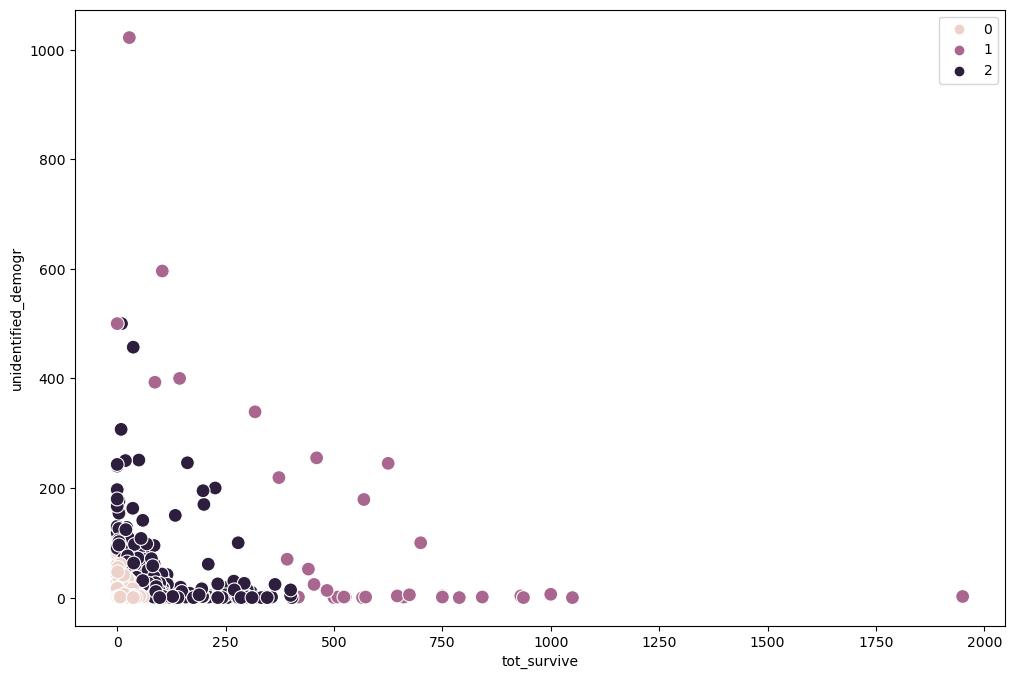

In [25]:
# Plot the clusters for the "tot_dead_miss" and "unidentified_demog" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numerical_df['tot_survive'], y=numerical_df['unidentified_demogr'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('tot_survive') # Label x-axis.
plt.ylabel('unidentified_demogr') # Label y-axis.
plt.show()

#### Clusters for number of survivants vs. number of unidentified are not really informative.

In [26]:
# Descriptive statistics for clusters

numerical_df.loc[numerical_df['clusters'] == 2, 'cluster'] = 'dark violet'
numerical_df.loc[numerical_df['clusters'] == 1, 'cluster'] = 'medium pink'
numerical_df.loc[numerical_df['clusters'] == 0, 'cluster'] = 'light pink'

In [27]:
numerical_df.groupby('cluster').agg({'month_num':['mean', 'median'], 
                         'year':['mean', 'median'], 
                         'tot_dead_miss':['mean', 'median'],
                         'tot_migrants':['mean', 'median'],
                         'tot_migrants':['mean', 'median'],
                         'tot_survive':['mean', 'median'],
                         'identified_demogr':['mean', 'median'],
                         'unidentified_demogr':['mean', 'median'],
                         'source_quality':['mean', 'median'],
                         'inc_type_num':['mean', 'median'] })

month_num                year         tot_dead_miss         \
                 mean median         mean  median          mean median   
cluster                                                                  
dark violet  6.616046    7.0  2018.306590  2018.0     42.461318   17.0   
light pink   6.634849    7.0  2019.266169  2019.0      3.025361    1.0   
medium pink  6.205882    6.0  2016.382353  2016.0    144.558824    5.5   

            tot_migrants        tot_survive        identified_demogr         \
                    mean median        mean median              mean median   
cluster                                                                       
dark violet   148.535817  120.0  106.074499   91.0          7.515759    1.0   
light pink      5.083634    1.0    2.058273    0.0          1.343729    1.0   
medium pink   726.147059  670.5  581.588235  546.0         14.058824    0.0   

            unidentified_demogr        source_quality        inc_type_num  \
                           mean median           mean median         mean   
cluster                                                                     
dark violet           34.945559    6.0       3.684814    4.0     1.154728   
light pink             1.681632    0.0       3.282009    4.0     1.022653   
medium pink          130.500000    4.0       3.264706    4.0     1.176471   

                    
            median  
cluster             
dark violet    1.0  
light pink     1.0  
medium pink    1.0

### As expected from the plots, the light-pink group is the one with the least victims per incident. However, the medium-pink cluster comprises incidents with more victims and overall migrants. Incidents in the medium-pink group happend on average earlier, incidents in the light-pink group happened most recently on average. The clusters are in scale similarly distributed across the other variables because the clusters and the variables are related to the overall number of victims per incident.  

### Further analyses may target the relations between when incidents happened and the number of victims (and of identfied victims) per incident, because the clusters differ in average of incident years and the months of incidents seem also relevant.

### 5. Add column and exclude df for Tableau

In [18]:
# I potentially need a data frame with the continent column, excluding the incidents with > identfied than actually dead or missing persons, but including the year_month column I initially created first in the next notebook.
# This is why I calculate the year_month column already now
# In the next Jupyter notebook, there is no need to include these above metioned and here excluded cases (less doubt about the columns registering deaths and missings, more doubt about the columns with demographic info)

# Export dataframe excluding incidents with more idetified than actually dead or missing cases
new_df['year_month'] = pd.to_datetime(new_df['year'].astype(str) + new_df['month_num'].astype(str), format='%Y%m')
new_df.shape 
new_df.head()

/var/folders/7f/g3kqhl2s2wd2fd054p87pc_w0000gn/T/ipykernel_94735/2244055148.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['year_month'] = pd.to_datetime(new_df['year'].astype(str) + new_df['month_num'].astype(str), format='%Y%m')


,main_ID,incident_ID,inc_type,region_inc,website_date_new,month_num,year,tot_dead_miss,tot_migrants,tot_survive,...,migration_route,loc_death,info_source,UNSD_geo_group,source_quality,inc_type_num,vict_per_incidents,coordinates,continent,year_month
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,1,2014,1,1,0,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4,"31.650259, -110.366453",North America,2014-01-01
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,1,2014,1,1,0,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4,"31.59713, -111.73756",North America,2014-01-01
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,1,2014,1,1,0,...,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,Northern America,5,1,1-4,"31.94026, -113.01125",North America,2014-01-01
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,1,2014,1,1,0,...,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...",Northern America,5,1,1-4,"31.506777, -109.315632",North America,2014-01-01
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,1,2014,1,3,2,...,Unknown,Border between Russia and Estonia,EUBusiness (Agence France-Presse),Northern Europe,1,1,1-4,"59.1551, 28.0",Europe,2014-01-01


In [17]:
new_df.to_excel(os.path.join(path, 'Data', 'prepared data', 'tableau_excl_df.xlsx'))

In [28]:
numerical_df.to_excel(os.path.join(path, 'Data', 'prepared data', 'cluster_df.xlsx'))